# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score


# Data Preprocessing

In [2]:
def preprocess_data(filepath):
    data = pd.read_csv(filepath)
    scaler = StandardScaler()
    X = scaler.fit_transform(data.drop('Outcome', axis=1))
    y = data['Outcome'].values
    return X, y

# Activation Functions

In [3]:
# Sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Relu
def relu(z):
    return np.maximum(0, z)

# Forward Propagation

In [4]:
def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters

    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, Z2, A2)
    return A2, cache

# Back Propagation

In [5]:
def backward_propagation(X, Y, cache, parameters):
    Z1, A1, Z2, A2 = cache
    W1, b1, W2, b2 = parameters
    m = X.shape[0]

    dA2 = A2 - Y
    dW2 = np.dot(dA2, A1.T) / m
    db2 = np.sum(dA2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dA2) * relu(Z1 > 0)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = (dW1, db1, dW2, db2)

    return gradients

# Update Parameters

In [6]:
def update_parameters(parameters, gradients, learning_rate):

    W1, b1, W2, b2 = parameters
    dW1, db1, dW2, db2 = gradients

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return (W1, b1, W2, b2)

# Train and Evaluate

In [7]:

def train_and_evaluate(X_train, y_train, X_val, y_val, layer_dims, learning_rate, num_iterations):
    np.random.seed(3)

    W1 = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
    b1 = np.zeros((layer_dims[1], 1))

    W2 = np.random.randn(layer_dims[2], layer_dims[1]) * 0.01
    b2 = np.zeros((layer_dims[2], 1))

    parameters = (W1, b1, W2, b2)

    train_loss_list = []
    val_loss_list = []

    for i in range(num_iterations):

        # Forward Propagation
        A2_train, cache_train = forward_propagation(X_train, parameters)

        # train loss
        train_loss = log_loss(y_train, A2_train.flatten())
        train_loss_list.append(train_loss)

        # val loss
        A2_val, _ = forward_propagation(X_val, parameters)
        val_loss = log_loss(y_val, A2_val.flatten())
        val_loss_list.append(val_loss)

        # 1-0
        predictions_train = (A2_train > 0.5).astype(int)
        predictions_val = (A2_val > 0.5).astype(int)

        # Performance metrics
        train_accuracy = accuracy_score(y_train, predictions_train.flatten())

        val_accuracy = accuracy_score(y_val, predictions_val.flatten())

        train_auc = roc_auc_score(y_train, A2_train.flatten())
        val_auc = roc_auc_score(y_val, A2_val.flatten())

        # Back Propagation
        gradients = backward_propagation(X_train, y_train, cache_train, parameters)

        # Update Weights
        parameters = update_parameters(parameters, gradients, learning_rate)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss {train_loss:.4f}, Val Loss {val_loss:.4f}, "
                  f"Train Acc {train_accuracy:.4f}, Val Acc {val_accuracy:.4f}, "
                  f"Train AUC {train_auc:.4f}, Val AUC {val_auc:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(train_loss_list, label='Training Loss')
    plt.plot(val_loss_list, label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

    return parameters

# Learning Processes

In [11]:
def main(num_iterations = 1000, learning_rate = 0.01):

    X, y = preprocess_data('/content/diabetes.csv')

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    layer_dims = [X_train.shape[1], 2, 1]

    parameters = train_and_evaluate(X_train, y_train, X_val, y_val, layer_dims, learning_rate, num_iterations)

    return parameters



Iteration 0: Train Loss 0.6931, Val Loss 0.6931, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.4054, Val AUC 0.3319
Iteration 100: Train Loss 0.6747, Val Loss 0.6761, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.4511, Val AUC 0.3759
Iteration 200: Train Loss 0.6634, Val Loss 0.6659, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.5051, Val AUC 0.4264
Iteration 300: Train Loss 0.6566, Val Loss 0.6599, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.5679, Val AUC 0.5009
Iteration 400: Train Loss 0.6524, Val Loss 0.6564, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.6400, Val AUC 0.5678
Iteration 500: Train Loss 0.6497, Val Loss 0.6543, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.6966, Val AUC 0.6213
Iteration 600: Train Loss 0.6481, Val Loss 0.6530, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.7360, Val AUC 0.6683
Iteration 700: Train Loss 0.6470, Val Loss 0.6523, Train Acc 0.6531, Val Acc 0.6429, Train AUC 0.7616, Val AUC 0.6968
Iteration 800: Train Loss 0.6463, Val Loss 0.6519, Train A

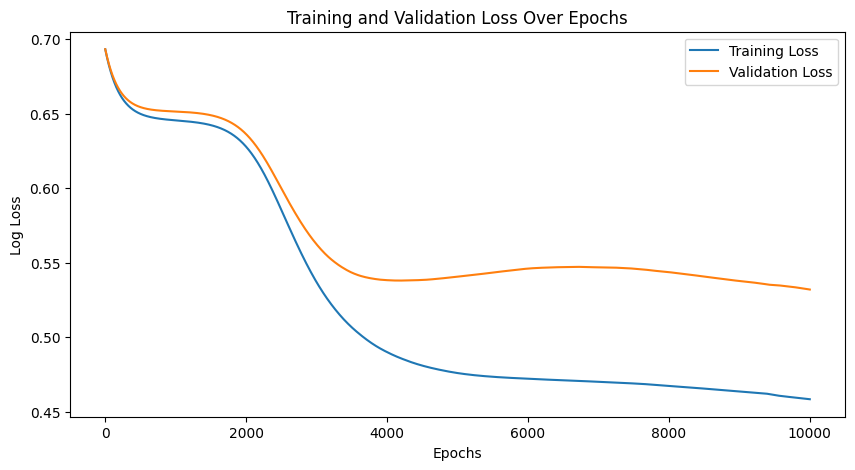

In [12]:

parameters = main(num_iterations=10000)